# 15.5 Homework

a) Write a program that generates and prints out two random numbers between 1 and 6, to simulate the rolling of two dice. 

b) Modify your program to simulate the rolling of two dice a million times (N0) and count the number of times you get double six (N1). Calculate the probability of finding double six in your simulations (N1/N0).

c) Write a program to generate random integers within [-5, 5], find the magic series of {a, c, m} [Don't use the built-function in numpy]

## Part a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(5):
    print('For set', i + 1, 'of two random numbers between 1 and 6, the two numbers are:')
    for j in range(2):
        print(np.random.randint(1, 7))

For set 1 of two random numbers between 1 and 6, the two numbers are:
1
5
For set 2 of two random numbers between 1 and 6, the two numbers are:
1
6
For set 3 of two random numbers between 1 and 6, the two numbers are:
5
1
For set 4 of two random numbers between 1 and 6, the two numbers are:
1
1
For set 5 of two random numbers between 1 and 6, the two numbers are:
4
3


## Part b)

In [40]:
N0 = 1000000
N1 = 0
for i in range(N0):
    x = np.random.randint(1, 7)
    y = np.random.randint(1, 7)
    if x + y == 6:
        N1 += 1
print('Probability(Double Six) =', N1/N0)

Probability(Double Six) = 0.138895


So how do we know that this probability of getting a double six is reasonable? Well, this is actually a problem that I've encountered many times in all my Statistics course. What we can do  is define the sample space which contains all the possible combinations of numbers of the dice. We can call that sample space $ S $. 

In [52]:
S = []
for i in range(6):
    for j in range(6):
        S.append([i + 1, j + 1])
print(S)

[[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6]]


Now, I would like to extract all the sub-elements whose elements sum up to 6. 

In [53]:
n_double_six = 0
for i in range(len(S)):
    if S[i][0] + S[i][1] == 6:
        n_double_six += 1
        print(S[i])
print('There are', n_double_six, 'subsets for which the sum of the number on the face of each die is equal to 6.')

[1, 5]
[2, 4]
[3, 3]
[4, 2]
[5, 1]
There are 5 subsets for which the sum of the number on the face of each die is equal to 6.


I will take this number and divide it by the length of the sample space, which is 36, and that will be the theoretical probability of getting a double six.

In [54]:
print('Probability_Theoretical(Double Six) =', n_double_six/len(S))

Probability_Theoretical(Double Six) = 0.1388888888888889


So, we did a pretty nice job of randomizing earlier, because this value is roughly equal to what we got using random number generation.

## Part c)

## Reference: 

$ x = (ax + c) mod $ $ m $

Finding the proper {a, c, m} for which $ x $ will be within the interval $ [-5, 5] $ is going to be a challenge. 

[4.5, -5.2, -0.408589, -0.29141100000000003, 1.5153750000000001, -2.2153750000000003, -0.165622, -0.534378, 1.467894, -2.167894, 0.0005300000000000304, -0.7005300000000001, 2.326101, -3.026101, -0.20076699999999997, -0.49923300000000004, 2.804943, -3.5049430000000004, 3.851159, -4.551159, 0.5122260000000001, -1.212226, -0.24659799999999998, -0.453402, 2.55621, -3.2562100000000003, 2.439383, -3.139383, 2.133177, -2.833177, 2.581814, -3.2818140000000002, 2.183193, -2.8831930000000003, 1.5509750000000002, -2.2509750000000004, 2.701104, -3.401104, -0.084457, -0.615543, 1.741146, -2.4411460000000003, 0.7471159999999999, -1.4471159999999998, 3.8732100000000003, -4.57321, 2.649422, -3.349422, 2.092563, -2.7925630000000004, 3.8849270000000002, -4.584927, 2.112327, -2.8123270000000002, 0.551723, -1.251723, -0.496119, -0.203881, 2.160755, -2.860755, 2.101998, -2.801998, 2.648903, -3.348903, 0.8139719999999999, -1.5139719999999999, 3.153485, -3.853485, 3.393693, -4.093693, 4.449041, -5.149041, 3.

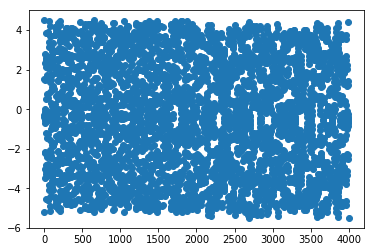

In [53]:
m = 5000001
a = 4954295
c = 45705
x = 1
y = []
j = 999
for i in range(1000):
    x = (a*x + c) % m
    y.append(x/1000000 - .5)
    y.append(-x/1000000 - .2)
while(j > 0):
    y.append(-y[j] - .8)
    y.append(y[j] - .3)
    j = j - 1
print(y[0:100])
plt.plot(y, 'o')
plt.show()

So for here, I tried to be as creative as I possibly could. The plot shows that the data is mostly random. I spent some time playing with modular arithmetic by hand and for me personally, an ideal $ {a, c, m} $ would be, in this case, $ {4954295, 45705, 5000001} $. Keep in mind that as I've shown in the program, we need to divide the resulting $ x $ by $ 1,000,000 $ right before we append it to $ y $, because $ -5,000,000 < x < 5,000,000 $ and dividing all sides of this inequality will make sure the numbers are between $ -5 $ and $ 5 $, inclusive. So, this is the best I could program my random number generator, but we all know that there are more and better ways.